In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

from skimage.filters import threshold_triangle
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages')
import os
import statsmodels.api as sm
import cv2
import matplotlib.patches as mpatches
import psutil
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.colors import Normalize


%matplotlib inline
plt.rcParams.update({'font.size': 20})

from sklearn.feature_extraction.image import grid_to_graph
from mpl_toolkits.axes_grid1 import ImageGrid
import json
from matplotlib.ticker import FuncFormatter

import nibabel as nib

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import itertools
import random
from scipy.cluster import hierarchy
import matplotlib as mpl
from matplotlib.pyplot import cm

from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression

import pickle
from sklearn.decomposition import PCA

In [9]:
###########################
### pooled superfly PCA ###
###########################

file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210130_superv_depth_correction/20210214_temporal.npy'
temporal_super = np.load(file)
temporal_super.shape #timepoint by PC

(30456, 1000)

In [ ]:
######################
### Individual PCA ###
######################



In [37]:
dataset_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset"
fly_names = ['fly_087', 'fly_089', 'fly_094', 'fly_097', 'fly_098', 'fly_099', 'fly_100', 'fly_101', 'fly_105']
#fly_names = ['fly_087']

In [38]:
for i, fly in enumerate(fly_names):
    print(fly)

    file = F'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210130_superv_depth_correction/20210214_eigen_vectors_ztrim_fly{i}.npy'
    vectors = np.load(file).real
    #print(vectors.shape)# vectors is voxel by PC probably (3384, 3384)
    print(f'vectors are {vectors.shape} voxel by PC')

    load_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210130_superv_depth_correction/super_brain.pickle'
    with open(load_file, 'rb') as handle:
        temp_brain = pickle.load(handle)
    #brain is a dict of z, each containing a variable number of supervoxels
    #one dict element looks like: (n_clusters, 3384, 9)
    X = np.zeros((0,3384,9))
    for z in range(9,49-9):
        X = np.concatenate((X,temp_brain[z]),axis=0)
    X = np.swapaxes(X,1,2) # THIS LINE WAS MISSING
    X = np.reshape(X,(26840, -1))
    X = X.T
    #X.shape # x is time by voxels (30456, 26840)
    num_tp = 3384
    start = i*num_tp
    stop = (i+1)*num_tp
    X = X[start:stop,:] # now (3384,26840)
    print(f'X is {X.shape} time by voxel - expecting (3384,26840)')

    temporal = X.dot(vectors)
    file = F'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210130_superv_depth_correction/20210301_temporal_indiv_pcs_fly{i}.npy'
    np.save(file, temporal[:,:3384])
#     brain = np.matmul(temporal[:,:num_pcs], vectors[:,:num_pcs].T)
#     # brain should be (3384, 26840) time by voxel
#     print(f'brain is {brain.shape} time by voxel - expecting (3384,26840)')
#     num_tp = 3384
#     start = i*num_tp
#     stop = (i+1)*num_tp
#     reconstructed[start:stop,:] = brain

fly_087
vectors are (26840, 26840) voxel by PC
X is (3384, 26840) time by voxel - expecting (3384,26840)
fly_089
vectors are (26840, 26840) voxel by PC
X is (3384, 26840) time by voxel - expecting (3384,26840)
fly_094
vectors are (26840, 26840) voxel by PC
X is (3384, 26840) time by voxel - expecting (3384,26840)
fly_097
vectors are (26840, 26840) voxel by PC
X is (3384, 26840) time by voxel - expecting (3384,26840)
fly_098
vectors are (26840, 26840) voxel by PC
X is (3384, 26840) time by voxel - expecting (3384,26840)
fly_099
vectors are (26840, 26840) voxel by PC
X is (3384, 26840) time by voxel - expecting (3384,26840)
fly_100
vectors are (26840, 26840) voxel by PC
X is (3384, 26840) time by voxel - expecting (3384,26840)
fly_101
vectors are (26840, 26840) voxel by PC
X is (3384, 26840) time by voxel - expecting (3384,26840)
fly_105
vectors are (26840, 26840) voxel by PC
X is (3384, 26840) time by voxel - expecting (3384,26840)


In [39]:
temporal.shape

(3384, 26840)

(1000, 2000)

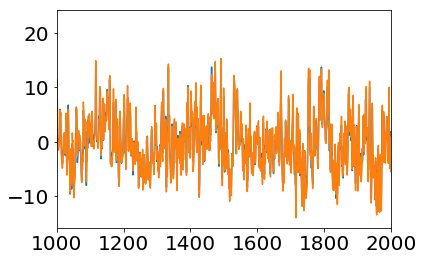

In [36]:
pc=1
plt.plot(temporal_super[:3384,pc])
plt.plot(temporal[:,pc])
plt.xlim(1000,2000)

In [41]:
file = F'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210130_superv_depth_correction/20210214_eigen_vectors_ztrim.npy'
vectors = np.load(file).real
print(f'vectors are {vectors.shape} voxel by PC')

load_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210130_superv_depth_correction/super_brain.pickle'
with open(load_file, 'rb') as handle:
    temp_brain = pickle.load(handle)
#brain is a dict of z, each containing a variable number of supervoxels
#one dict element looks like: (n_clusters, 3384, 9)
X = np.zeros((0,3384,9))
for z in range(9,49-9):
    X = np.concatenate((X,temp_brain[z]),axis=0)
X = np.swapaxes(X,1,2) # THIS LINE WAS MISSING
X = np.reshape(X,(26840, -1))
X = X.T
#X.shape # x is time by voxels (30456, 26840)
# num_tp = 3384
# start = i*num_tp
# stop = (i+1)*num_tp
# X = X[start:stop,:] # now (3384,26840)
print(f'X is {X.shape} time by voxel - expecting (3384,26840)')

temporal = X.dot(vectors)
print(temporal.shape)

vectors are (26840, 26840) voxel by PC
X is (30456, 26840) time by voxel - expecting (3384,26840)
(30456, 26840)


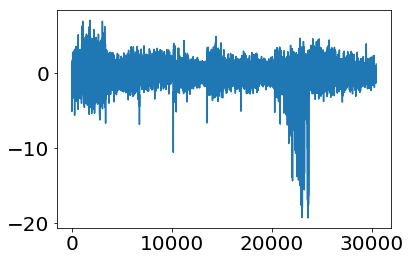

In [52]:
plt.plot(temporal[:,6])

In [53]:
file = F'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210130_superv_depth_correction/20210301_temporal.npy'
np.save(file, temporal)

In [54]:
temporal.shape

(30456, 26840)